In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# S&P Case Schiller Home Price Index Data 

In [143]:
Price = pd.read_csv('CSUSHPISA.csv')
Price

,DATE,CSUSHPISA
0,2000-05-01,103.677
1,2000-06-01,104.424
2,2000-07-01,105.054
3,2000-08-01,105.767
4,2000-09-01,106.537
...,...,...
260,2022-01-01,284.767
261,2022-02-01,290.371
262,2022-03-01,296.496
263,2022-04-01,301.704


In [144]:
Price.rename(columns = {'CSUSHPISA':'Prices'}, inplace = True)

In [145]:
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    265 non-null    object 
 1   Prices  265 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [146]:
Price.describe()

,Prices
count,265.000000
mean,169.549819
std,39.571357
min,103.677000
25%,142.277000
50%,165.219000
75%,184.740000
max,304.831000


### Converting dates from object to datetime

In [147]:
Price['DATE'] = pd.to_datetime(Price['DATE'])

In [148]:
Price.set_index(['DATE'],inplace=True)

In [149]:
Price =Price.resample('Q').mean()

In [150]:
Price

,Prices
DATE,
2000-06-30,104.050500
2000-09-30,105.786000
2000-12-31,108.274667
2001-03-31,110.484667
2001-06-30,112.203333
...,...
2021-06-30,254.633000
2021-09-30,266.878333
2021-12-31,276.591000


# Collecting Data of National Factors that Influence the Home Prices in US

## 1. Delinquency Rate on Mortgages

The delinquency rate on housing mortgages are an indicator of the number of foreclosures in real estate. This is an important factor in both, demand and supply. Higher delinquency rate (higher than credit card delinquency rate) in the last economic recession was a key indicator of the recession and the poorly performing industry and the economy as a whole. It also indicates how feasible it is for a homeowner to buy a house at a certain point of time and is an indicator of the overall demand in the industry.

In [205]:
DR = pd.read_csv('DelinquencyRate.csv')
DR

,DATE,DRSFRMACBS
0,2000-01-01,1.95
1,2000-04-01,1.97
2,2000-07-01,2.09
3,2000-10-01,2.23
4,2001-01-01,2.34
...,...,...
85,2021-04-01,2.48
86,2021-07-01,2.31
87,2021-10-01,2.28
88,2022-01-01,2.09


In [206]:
DR['DATE'] = pd.to_datetime(DR['DATE'])

In [207]:
DR.set_index(['DATE'],inplace=True)

In [208]:
DR = DR.resample('Q').mean()

In [209]:
DR.drop(DR.index.min(),inplace=True)

In [210]:
DR.rename(columns = {'DRSFRMACBS':'DelinquencyRate'}, inplace = True)

In [211]:
DR

,DelinquencyRate
DATE,
2000-06-30,1.97
2000-09-30,2.09
2000-12-31,2.23
2001-03-31,2.34
2001-06-30,2.41
...,...
2021-06-30,2.48
2021-09-30,2.31
2021-12-31,2.28


##  2. Real Gross Domestic Product(GDPC1)

The GDP is a measure of output of the economy overall, and the health of the economy. An economy that is doing well usually implies more investment and economic activity, and more buying.

In [158]:
gdp = pd.read_csv('GDPC1 (1).csv')
gdp

,DATE,GDPC1
0,2000-01-01,12935.252
1,2000-04-01,13170.749
2,2000-07-01,13183.890
3,2000-10-01,13262.250
4,2001-01-01,13219.251
...,...,...
85,2021-04-01,19368.310
86,2021-07-01,19478.893
87,2021-10-01,19806.290
88,2022-01-01,19727.918


In [159]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

In [160]:
gdp.set_index(['DATE'], inplace = True)

In [161]:
gdp = gdp.resample('Q').mean()

In [162]:
gdp.drop(gdp.index.min(),inplace=True)

In [163]:
gdp

,GDPC1
DATE,
2000-06-30,13170.749
2000-09-30,13183.890
2000-12-31,13262.250
2001-03-31,13219.251
2001-06-30,13301.394
...,...
2021-06-30,19368.310
2021-09-30,19478.893
2021-12-31,19806.290


## 3. Federal Funds Effective Rate(DFF)

Federal Funds Rate influences multiple factors in the economy, beyond just the real estate market, many of which factors indirectly influence the real estate market. It is a key metric to change the way an economy is performing.

In [164]:
DFF = pd.read_csv('DFF.csv')
DFF

,DATE,DFF
0,2000-01-01,3.99
1,2000-01-02,3.99
2,2000-01-03,5.43
3,2000-01-04,5.38
4,2000-01-05,5.41
...,...,...
8152,2022-04-27,0.33
8153,2022-04-28,0.33
8154,2022-04-29,0.33
8155,2022-04-30,0.33


In [165]:
DFF['DATE'] = pd.to_datetime(DFF['DATE'])

In [166]:
DFF.set_index(['DATE'], inplace = True)

In [167]:
DFF = DFF.resample('Q').mean()

In [168]:
DFF.drop(DFF.index.min(),inplace=True)

In [169]:
DFF

,DFF
DATE,
2000-06-30,6.271978
2000-09-30,6.519457
2000-12-31,6.474891
2001-03-31,5.597000
2001-06-30,4.326703
...,...
2021-06-30,0.068242
2021-09-30,0.090000
2021-12-31,0.079457


## 4. Wage

The “weakly earnings” are taken as a measure of overall wages and earning of all employed persons. This is an important measure as well, as it takes into account other factors like taxes etc.

In [170]:
Wage = pd.read_csv('LEU0252887700Q.csv')
Wage

,DATE,LEU0252887700Q
0,2000-01-01,603
1,2000-04-01,606
2,2000-07-01,611
3,2000-10-01,614
4,2001-01-01,620
...,...,...
85,2021-04-01,1048
86,2021-07-01,1068
87,2021-10-01,1069
88,2022-01-01,1100


In [171]:
Wage['DATE'] = pd.to_datetime(Wage['DATE'])

In [172]:
Wage.set_index(['DATE'], inplace = True)

In [173]:
Wage = Wage.resample('Q').mean()

In [174]:
Wage.drop(Wage.index.min(),inplace=True)

In [175]:
Wage.rename(columns = {'LEU0252887700Q': 'Wage'}, inplace = True)

In [176]:
Wage

,Wage
DATE,
2000-06-30,606.0
2000-09-30,611.0
2000-12-31,614.0
2001-03-31,620.0
2001-06-30,624.0
...,...
2021-06-30,1048.0
2021-09-30,1068.0
2021-12-31,1069.0


## 5. Unemployment Rate

Unemployment can also affect both demand and supply in the real estate industry. A high unemployment rate can mean that people simply do not have the money to spend on houses. It can also mean that there is lower investment in the industry and hence lower supply.

In [186]:
UR = pd.read_csv('UNRATE.csv')
UR

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
266,2022-03-01,3.6
267,2022-04-01,3.6
268,2022-05-01,3.6
269,2022-06-01,3.6


In [187]:
UR = UR.loc[:268]

In [188]:
UR['DATE'] = pd.to_datetime(UR['DATE'])

UR.set_index(['DATE'], inplace = True)

UR = UR.resample('Q').mean()

UR.drop(UR.index.min(),inplace=True)

UR

C:\Users\Dell\AppData\Local\Temp\ipykernel_8064\1875796501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UR['DATE'] = pd.to_datetime(UR['DATE'])


,UNRATE
DATE,
2000-06-30,3.933333
2000-09-30,4.000000
2000-12-31,3.900000
2001-03-31,4.233333
2001-06-30,4.400000
...,...
2021-06-30,5.900000
2021-09-30,5.100000
2021-12-31,4.233333


## 6. New Home

This is a measure of the number of units of new housing projects started in a given period. Sometimes it is also measured in valuation of housing projects started in a given period.

In [189]:
NewHome = pd.read_csv('MSACSR-2.csv')
NewHome

,DATE,MSACSR
0,2000-01-01,4.3
1,2000-02-01,4.3
2,2000-03-01,4.3
3,2000-04-01,4.4
4,2000-05-01,4.4
...,...,...
264,2022-01-01,5.7
265,2022-02-01,6.0
266,2022-03-01,7.0
267,2022-04-01,8.4


In [190]:
NewHome['DATE'] = pd.to_datetime(NewHome['DATE'])

NewHome.set_index(['DATE'], inplace = True)

NewHome = NewHome.resample('Q').mean()

NewHome.drop(UR.index.min(),inplace=True)

NewHome

,MSACSR
DATE,
2000-03-31,4.300000
2000-09-30,4.166667
2000-12-31,3.933333
2001-03-31,3.766667
2001-06-30,4.033333
...,...
2021-06-30,5.300000
2021-09-30,6.200000
2021-12-31,6.233333


In [195]:
NewHome.rename(columns = {'MSACSR': 'new'}, inplace = True)

## 7. Sold Homes

In [191]:
HomeSold = pd.read_csv('HNFSEPUSSA-2.csv')
HomeSold

,DATE,HNFSEPUSSA
0,2000-01-01,311.0
1,2000-02-01,299.0
2,2000-03-01,313.0
3,2000-04-01,305.0
4,2000-05-01,305.0
...,...,...
264,2022-01-01,394.0
265,2022-02-01,396.0
266,2022-03-01,411.0
267,2022-04-01,432.0


In [192]:
HomeSold.rename(columns = {'HNFSEPUSSA': 'Homes_Sold'}, inplace = True)

In [193]:
HomeSold['DATE'] = pd.to_datetime(HomeSold['DATE'])

HomeSold.set_index(['DATE'], inplace = True)

HomeSold = HomeSold.resample('Q').mean()

HomeSold.drop(HomeSold.index.min(), inplace = True)

HomeSold

,Homes_Sold
DATE,
2000-06-30,305.333333
2000-09-30,301.666667
2000-12-31,301.333333
2001-03-31,294.666667
2001-06-30,296.666667
...,...
2021-06-30,331.000000
2021-09-30,370.333333
2021-12-31,388.666667


In [212]:
df = pd.concat([DR, gdp, Wage, DFF, UR, NewHome, HomeSold, Price], axis=1, join='inner')
df

,DelinquencyRate,GDPC1,Wage,DFF,UNRATE,new,Homes_Sold,Prices
DATE,,,,,,,,
2000-09-30,2.09,13183.890,611.0,6.519457,4.000000,4.166667,301.666667,105.786000
2000-12-31,2.23,13262.250,614.0,6.474891,3.900000,3.933333,301.333333,108.274667
2001-03-31,2.34,13219.251,620.0,5.597000,4.233333,3.766667,294.666667,110.484667
2001-06-30,2.41,13301.394,624.0,4.326703,4.400000,4.033333,296.666667,112.203333
2001-09-30,2.19,13248.142,636.0,3.501522,4.833333,4.333333,307.666667,114.156000
...,...,...,...,...,...,...,...,...
2021-06-30,2.48,19368.310,1048.0,0.068242,5.900000,5.300000,331.000000,254.633000
2021-09-30,2.31,19478.893,1068.0,0.090000,5.100000,6.200000,370.333333,266.878333
2021-12-31,2.28,19806.290,1069.0,0.079457,4.233333,6.233333,388.666667,276.591000


<AxesSubplot:xlabel='DelinquencyRate', ylabel='Prices'>

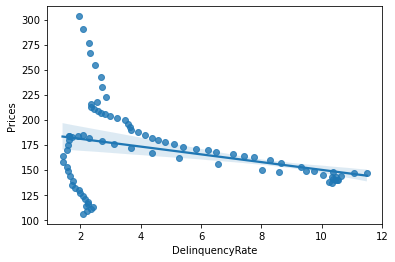

In [213]:
sns.regplot(x = 'DelinquencyRate', y = 'Prices', data = df)

<AxesSubplot:>

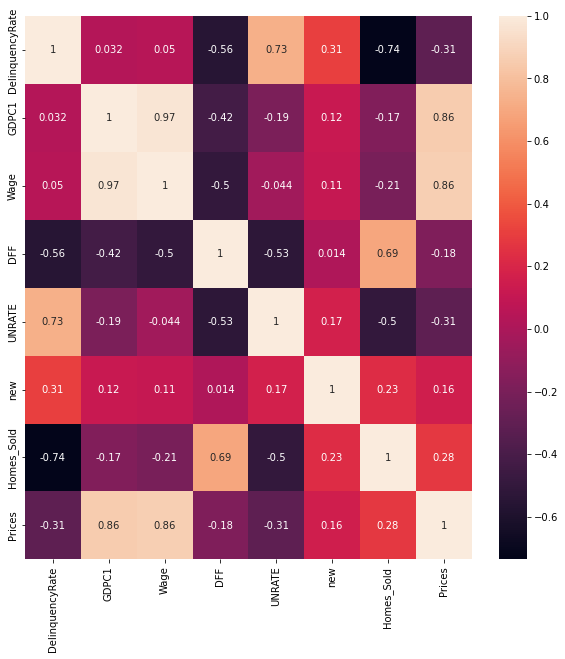

In [220]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

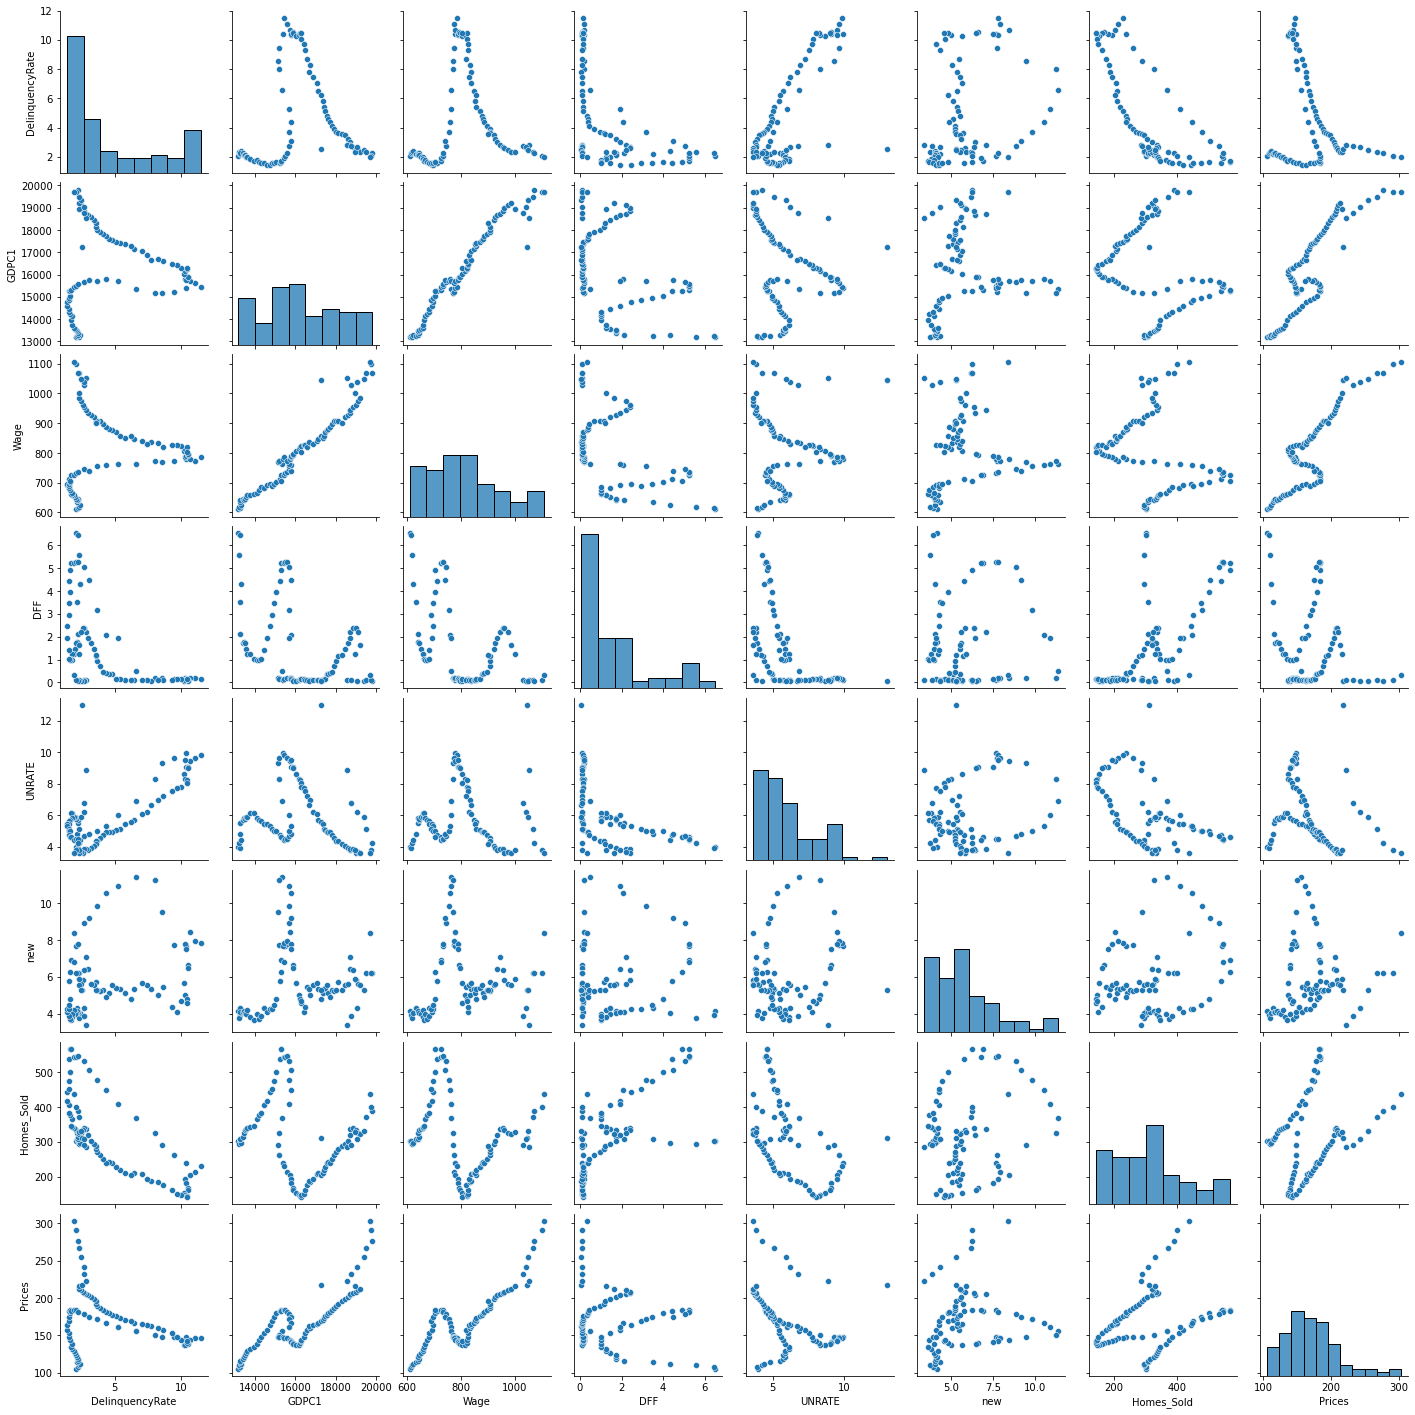

In [221]:
sns.pairplot(df)

In [222]:
df.corr()

,DelinquencyRate,GDPC1,Wage,DFF,UNRATE,new,Homes_Sold,Prices
DelinquencyRate,1.000000,0.032284,0.050301,-0.555102,0.734583,0.306967,-0.735617,-0.313110
GDPC1,0.032284,1.000000,0.968150,-0.424401,-0.189858,0.124856,-0.167151,0.856788
Wage,0.050301,0.968150,1.000000,-0.500246,-0.043942,0.106007,-0.205736,0.864991
DFF,-0.555102,-0.424401,-0.500246,1.000000,-0.525708,0.014361,0.692464,-0.178765
UNRATE,0.734583,-0.189858,-0.043942,-0.525708,1.000000,0.170307,-0.500282,-0.314454
new,0.306967,0.124856,0.106007,0.014361,0.170307,1.000000,0.233165,0.157279
Homes_Sold,-0.735617,-0.167151,-0.205736,0.692464,-0.500282,0.233165,1.000000,0.279696
Prices,-0.313110,0.856788,0.864991,-0.178765,-0.314454,0.157279,0.279696,1.000000


In [223]:
df.to_csv('df.csv')

### * After doing a slight research on the given data, I chose some factors which affect the Home Prices in US.

### * The 7 factors are as follows - 

1. Delinquency Rate on Mortgages
2. Real Gross Domestic Product(GDPC1)
3. Federal Funds Effective Rate(DFF)
4. Wages
5. Unemployment Rate
6. New Houses
7. Sold Houses

### * As the data was collected from an official site for key economic indicators the data had hardly any missing values.
### * Data was converted on quaterly basis. Hence, up-sampling and down-sampling of data was needed as per each dataset.
### * Moving further we clubbed our data in a single dataframe and checked the correlation for each factor.
### * Here we can se GDP and Wages were highly corelated with the Home Prices and hence, we can say GDP and wages are the factors affecting more on the Home Prices.